In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# wczytanie ocen z pliku do zmiennej
oceny = pd.read_csv('oceny_studentow.csv')

# wykasowanie indeksow bo pandas sam je dodaje
oceny = oceny.drop(oceny.columns[0], axis=1)
oceny

indeks_studenta  ocena_lab  ocena_wyk
0             962560        5.0        3.0
1             905220        2.0        4.5
2             882698        2.0        3.5
3             856084        3.5        2.5
4             909337        4.0        5.0
..               ...        ...        ...
493           909272        5.0        3.5
494           860148        4.0        2.0
495           919541        2.0        4.0
496           915447        4.5        4.0
497           905212        4.0        5.0

[498 rows x 3 columns]

In [75]:
oceny['ocena_wyliczona'] = 0.6*oceny['ocena_wyk'] + 0.4*oceny['ocena_lab']
oceny

indeks_studenta  ocena_lab  ocena_wyk  ocena_wyliczona
0             962560        5.0        3.0              3.8
1             905220        2.0        4.5              3.5
2             882698        2.0        3.5              2.9
3             856084        3.5        2.5              2.9
4             909337        4.0        5.0              4.6
..               ...        ...        ...              ...
493           909272        5.0        3.5              4.1
494           860148        4.0        2.0              2.8
495           919541        2.0        4.0              3.2
496           915447        4.5        4.0              4.2
497           905212        4.0        5.0              4.6

[498 rows x 4 columns]

In [159]:
# https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

# zaokrąglenie ocen do 0.5
oceny['ocena_kon'] = oceny['ocena_wyliczona'].astype(int) + np.where(oceny['ocena_wyliczona']%1>=0.5, 0.5, 0)

# wykasowanie ocen 2.5, ktorych nie ma na studiach
oceny['ocena_kon'] = np.where(oceny['ocena_kon']<3, 2, oceny['ocena_kon'])

oceny['zaliczenie'] = np.where(oceny['ocena_kon']>=3, True, False)

oceny

indeks_studenta  ocena_lab  ocena_wyk  ocena_wyliczona  ocena_kon  \
0             962560        5.0        3.0              3.8        3.5   
1             905220        2.0        4.5              3.5        3.5   
2             882698        2.0        3.5              2.9        2.0   
3             856084        3.5        2.5              2.9        2.0   
4             909337        4.0        5.0              4.6        4.5   
..               ...        ...        ...              ...        ...   
493           909272        5.0        3.5              4.1        4.0   
494           860148        4.0        2.0              2.8        2.0   
495           919541        2.0        4.0              3.2        3.0   
496           915447        4.5        4.0              4.2        4.0   
497           905212        4.0        5.0              4.6        4.5   

     zaliczenie  
0          True  
1          True  
2         False  
3         False  
4          True  
..          ...  
493        True  
494       False  
495        True  
496        True  
497        True  

[498 rows x 6 columns]

Text(0.5, 1.0, 'oceny końcowe')

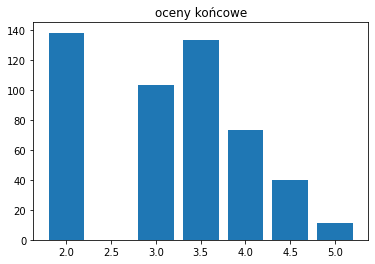

In [145]:
# https://stackoverflow.com/questions/30112420/histogram-for-discrete-values-with-matplotlib
plt.bar(*np.unique(oceny['ocena_kon'], return_counts=True), width=0.4)
plt.title('oceny końcowe')

360
498


([<matplotlib.patches.Wedge at 0x2b8acb61910>,
 [Text(-0.7088367411022181, 0.841160195482161, 'zaliczone'),
  Text(0.7088367411022178, -0.8411601954821611, 'niezaliczone')])

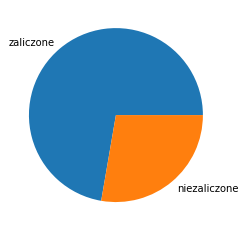

In [172]:
plt.pie([sum(oceny['zaliczenie']), len(oceny)-sum(oceny['zaliczenie'])], labels = ['zaliczone', 'niezaliczone'])

In [ ]:
plt.bar(*np.unique(oceny['ocena_lab'], return_counts=True), width=0.4)
plt.title('oceny labolatorium')

In [181]:
def avg(dane):
    return sum(dane)/len(dane)

def liczba_osob_z_ocena(dane, ocena):
    return dane == ocena

In [23]:
srednia_lab = avg(oceny['ocena_lab'])
srednia_lab

3.4467871485943773

In [25]:
srednia_wyk = avg(oceny['ocena_wyk'])
srednia_wyk

3.459839357429719

In [173]:
srednia_kon = avg(oceny['ocena_kon'])
srednia_kon

3.1676706827309236

In [188]:
# tworzymy slownik {ocena: liczba_ocen}
oceny_sumy = {}

for ocena in set(oceny['ocena_kon']):
    oceny_sumy[ocena] = sum(liczba_osob_z_ocena(oceny['ocena_kon'], ocena))
    
oceny_sumy

{2.0: 138, 3.0: 103, 3.5: 133, 4.5: 40, 4.0: 73, 5.0: 11}

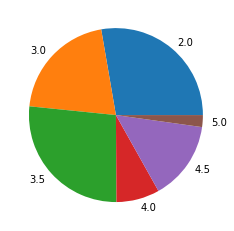

In [201]:
# na podstawie slownika mozemy zrobic w latwy sposob wykres kołowy
# klucze ocen są posortowane, żeby były w odpowiedniej kolejności na wykresie
plt.pie(oceny_sumy.values(), labels=sorted(oceny_sumy.keys()))
plt.show()

In [221]:
import csv
with open('podsumowanie.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow([round(srednia_lab,2), round(srednia_wyk,2), round(srednia_kon,2)])
    writer.writerow(oceny_sumy.values())
    writer.writerow([sum(oceny['zaliczenie'])])
    writer.writerow([len(oceny)-sum(oceny['zaliczenie'])])
    